Номер 3. Условие

Метрики в задаче регрессии
Сгенерируйте датасет из 500 точек на плоскости, для которых y = 0.5x + 1 + epsilon, где epsilon
распределено нормально с матожиданием 0 и дисперсией 0.2.
1. Визуализируйте выборку.
2. Восстановите по выборке зависимость y(x), считая, что зависимость имеет вид y = kx+b,
и минимизируя MSE на обучающей выборке, воспользовавшись scipy.optimize.minimize.
Визуализируйте восстановленную прямую.
3. Добавьте теперь в выборку 75 точек, для которых y = -1 + epsilon, а x принимает различные
значения из того же диапазона, что и у уже имевшихся точек в обучающей выборке. По
новой расширенной выборке снова попробуйте восстановить зависимость y(x) = kx + b
двумя способами: минимизируя MSE и минимизируя MAE. Визуализируйте полученные
прямые.
4. На основе полученных графиков сделайте вывод об устойчивости моделей, оптимизи-
рующих MSE и MAE к выбросам.

План: 1) Делаем 4 графика для выборки без выбросов (просто точки, график, приближение через MSE, приближение через MAE)
2) Делаем ещё 4 графика для выборки (просто точки с выбросами, график старый, который без выбросов, приближение графика для точек с выбросами через MSE, приближение графика для  точек с выбросами  через MAE)
3) Сделать вывод

In [1]:
import numpy  as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.optimize as sp_opt
import math as mt
%matplotlib inline

In [2]:
m1 = 500
m2 = 75

In [17]:
def MSE(x_val, y_val):
    def get_estimation_result(parameters):
        k = parameters[0]
        b = parameters[1]
        errors = y_val - k*x_val - b
        errors = np.mean(errors ** 2)
        return errors
    return get_estimation_result

def MAE(x_val, y_val):
    def get_estimation_result(parameters):
        k = parameters[0]
        b = parameters[1]
        errors = y_val - k*x_val - b
        errors = np.mean(abs(errors))
        return errors
    return get_estimation_result

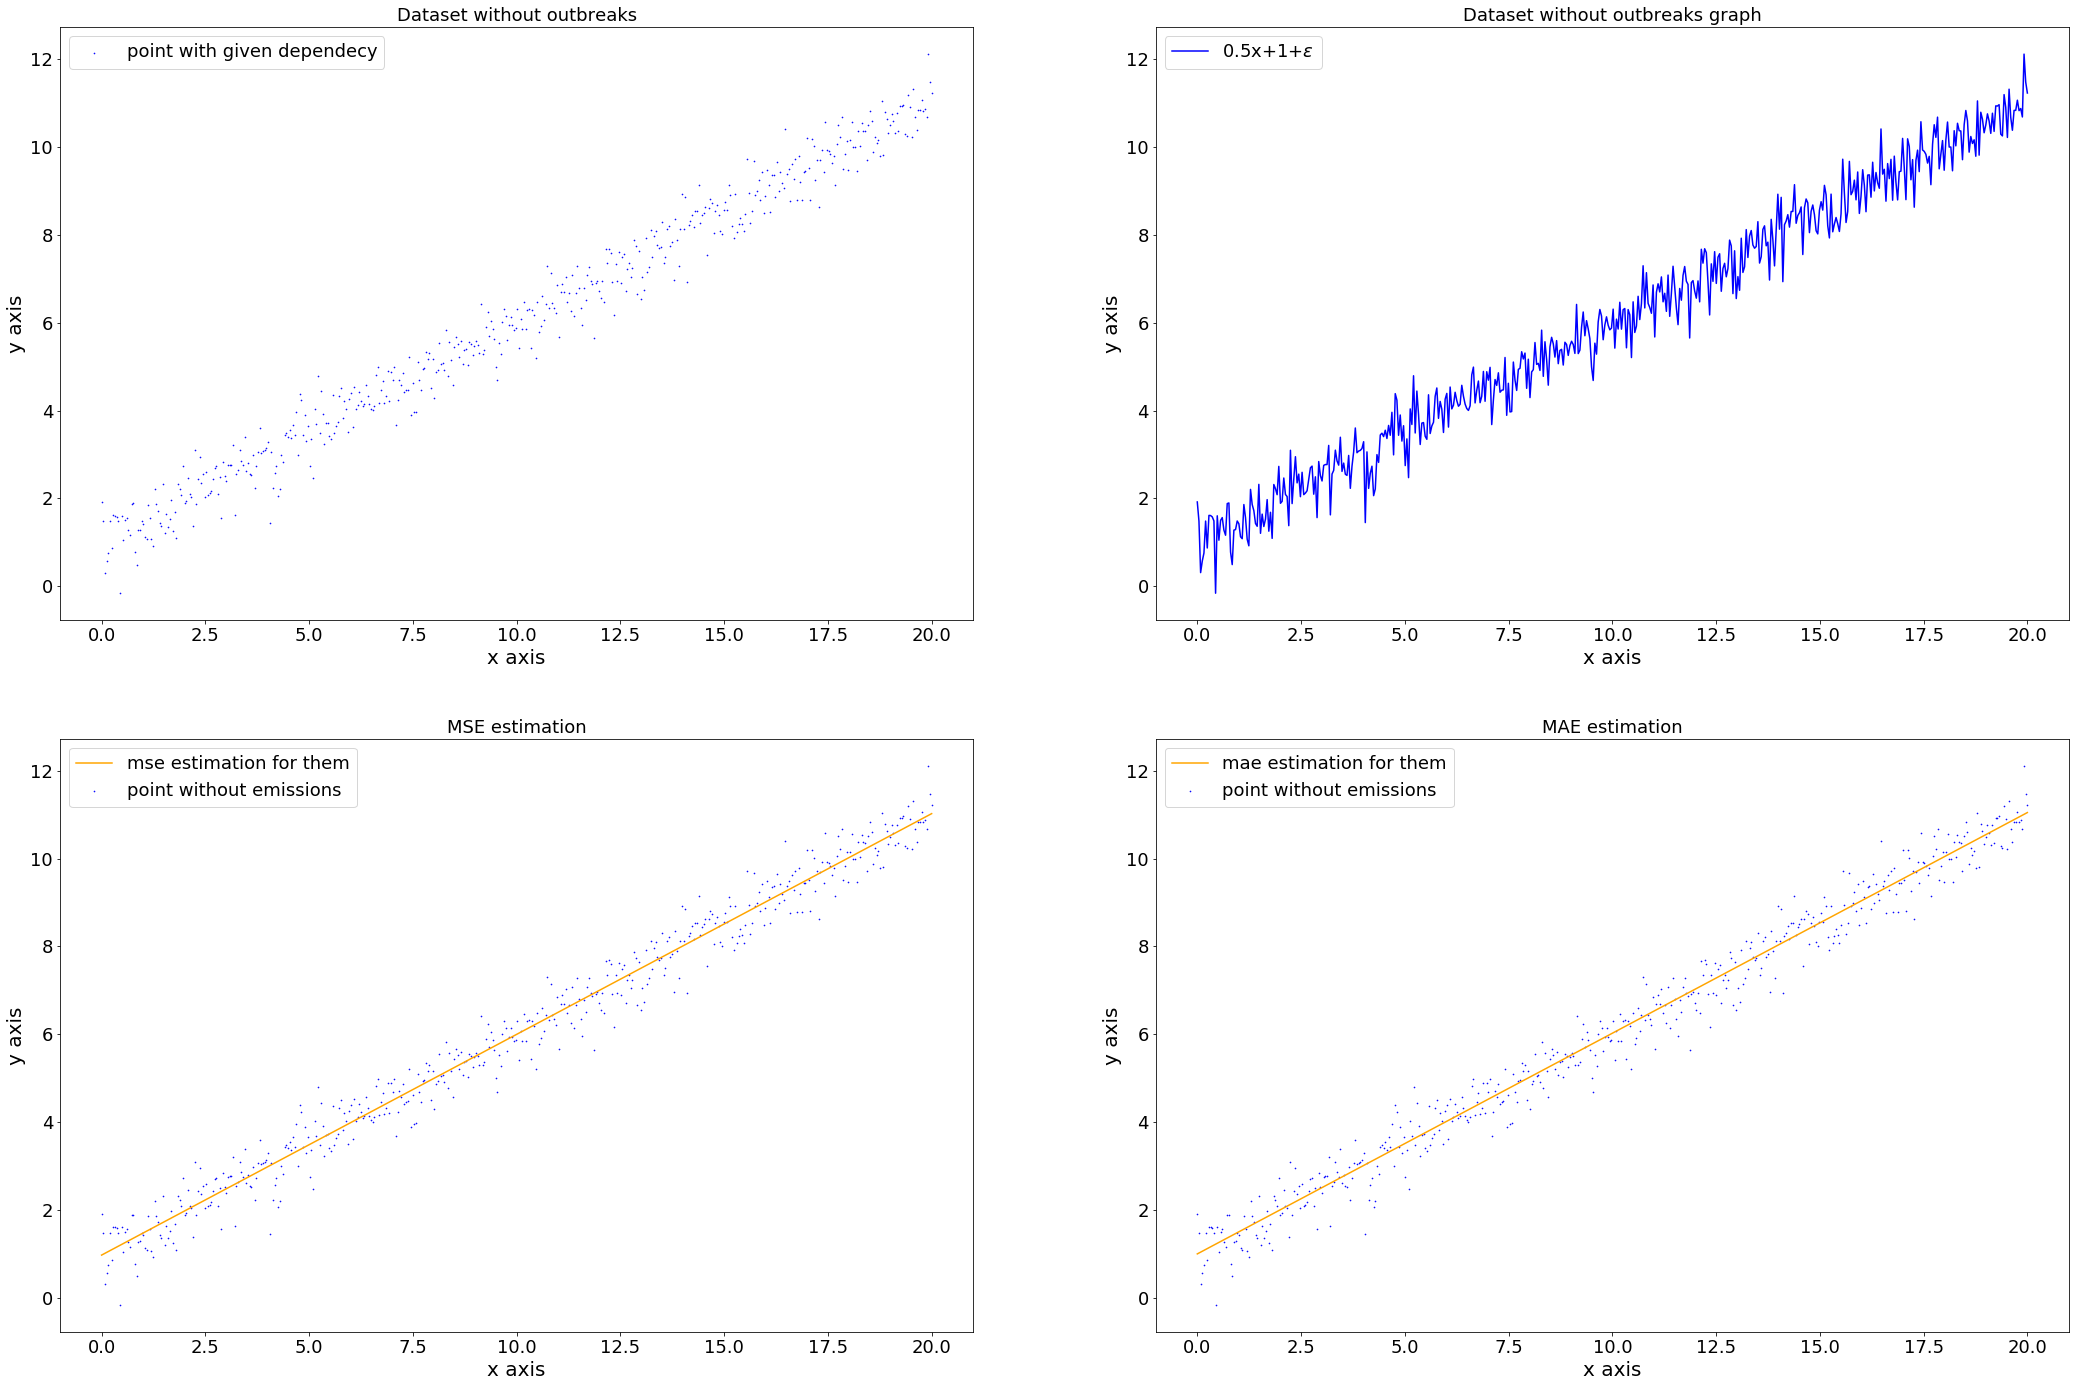

In [22]:
x_first_values = np.linspace(0, 20, m1)
first_errors = sps.norm.rvs(loc = 0, scale = np.sqrt(0.2), size = m1)
y_first_values = x_first_values*0.5 + 1 + first_errors

mse_res = sp_opt.minimize(MSE(x_first_values, y_first_values), [1, 1]).x
mae_res = sp_opt.minimize(MAE(x_first_values, y_first_values), [1, 1]).x

mse_y_vals = x_first_values * mse_res[0] + mse_res[1]
mae_y_vals = x_first_values * mae_res[0] + mae_res[1]

fig, ax = plt.subplots(nrows=2, ncols= 2, figsize=(36,24), sharex = False, sharey  =False)
for i in range(2):
    for j in range(2):
        for ticks in ax[i][j].yaxis.get_major_ticks():
            ticks.label.set_fontsize(18)
        ax[i][j].yaxis.set_label_text('y axis', fontsize = 20)
        ax[i][j].xaxis.set_label_text('x axis', fontsize = 20)
        for ticks in ax[i][j].xaxis.get_major_ticks():
                ticks.label.set_fontsize(18)
        

ax[0][1].plot(x_first_values, y_first_values, color = 'blue', label = '0.5x+1+$\\varepsilon$')
ax[0][1].set_title('Dataset without outbreaks graph', fontsize =18)
ax[0][1].legend(loc = 2, fontsize = 18)

ax[0][0].scatter(x_first_values, y_first_values, color = 'blue', label = 'point with given dependecy', s = 0.4)
ax[0][0].set_title('Dataset without outbreaks', fontsize =18)
ax[0][0].legend(loc = 2, fontsize = 18)

ax[1][1].scatter(x_first_values, y_first_values, color = 'blue', label = 'point without emissions', s = 0.4)
ax[1][1].plot(x_first_values, mae_y_vals, color = 'orange', label = 'mae estimation for them')
ax[1][1].set_title('MAE estimation', fontsize =18)
ax[1][1].legend(loc = 2, fontsize = 18)

ax[1][0].scatter(x_first_values, y_first_values, color = 'blue', label = 'point without emissions', s = 0.4)
ax[1][0].plot(x_first_values, mse_y_vals, color = 'orange', label = 'mse estimation for them')
ax[1][0].set_title('MSE estimation', fontsize =18)
ax[1][0].legend(loc = 2, fontsize = 18)

plt.show()

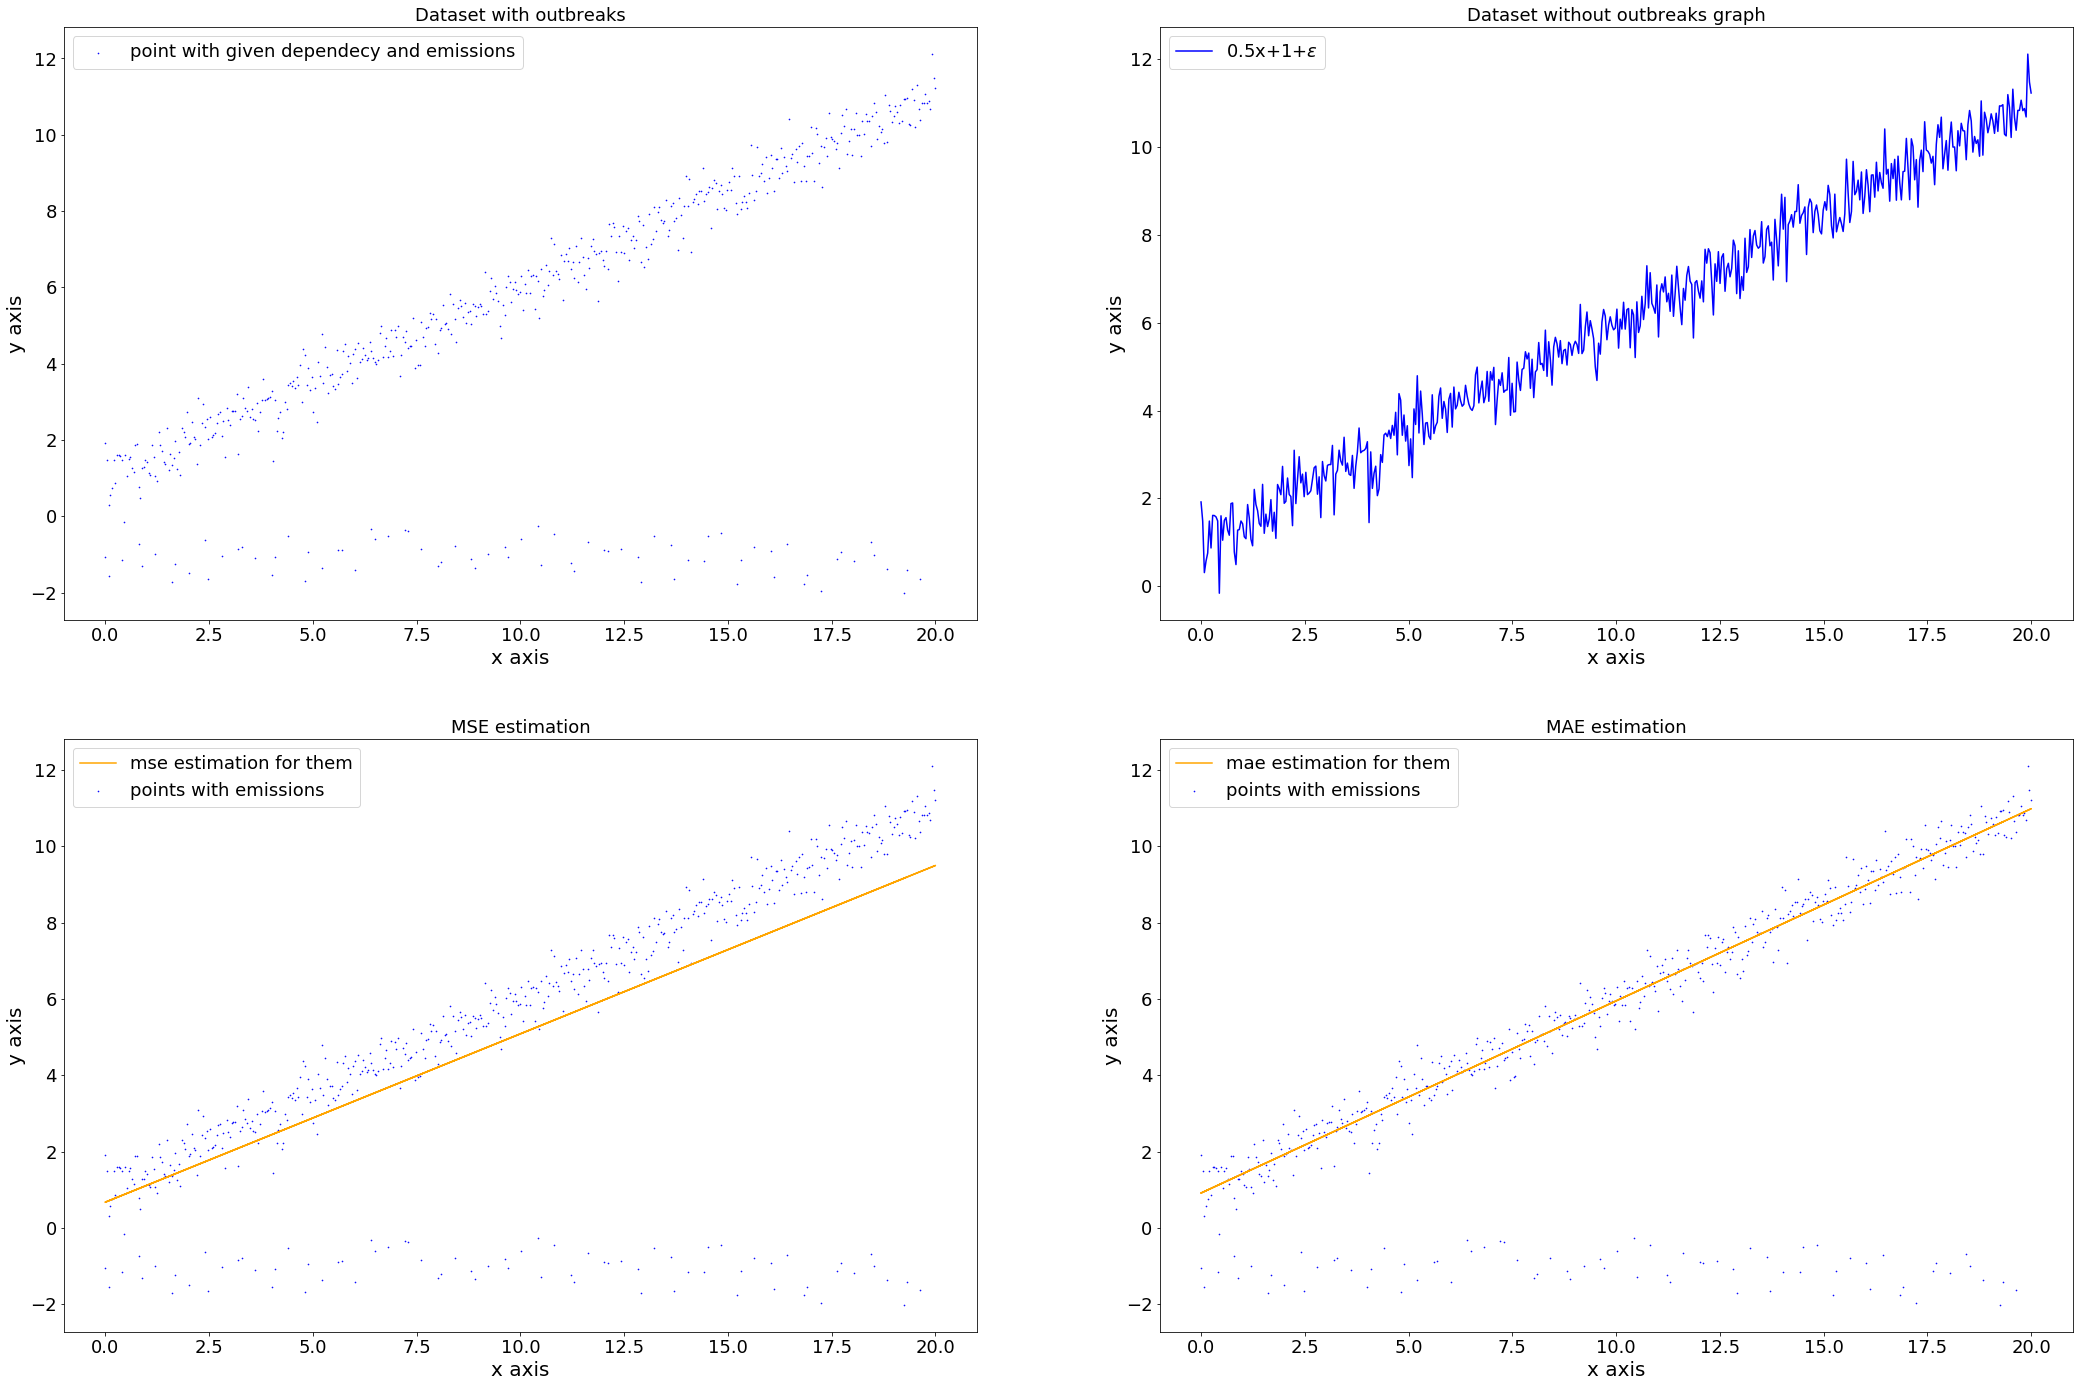

In [24]:
y_second_values = - 1 + sps.norm.rvs(loc = 0, scale = np.sqrt(0.2), size = m2)
x_second_values = np.hstack((x_first_values[np.arange(0, 500, 10)], x_first_values[np.arange(2, 502, 20)]))
all_y_values = np.hstack((y_first_values, y_second_values))
all_x_values = np.hstack((x_first_values, x_second_values))



mse_new_res = sp_opt.minimize(MSE(all_x_values, all_y_values), [1, 1]).x
mae_new_res = sp_opt.minimize(MAE(all_x_values, all_y_values), [1, 1]).x

mse_new_y_vals = all_x_values * mse_new_res[0] + mse_new_res[1]
mae_new_y_vals = all_x_values * mae_new_res[0] + mae_new_res[1]

fig, ax = plt.subplots(nrows=2, ncols= 2, figsize=(36,24), sharex = False, sharey  =False)
for i in range(2):
    for j in range(2):
        for ticks in ax[i][j].yaxis.get_major_ticks():
            ticks.label.set_fontsize(18)
        ax[i][j].yaxis.set_label_text('y axis', fontsize = 20)
        ax[i][j].xaxis.set_label_text('x axis', fontsize = 20)
        for ticks in ax[i][j].xaxis.get_major_ticks():
                ticks.label.set_fontsize(18)
        

ax[0][1].plot(x_first_values, y_first_values, color = 'blue', label = '0.5x+1+$\\varepsilon$')
ax[0][1].set_title('Dataset without outbreaks graph', fontsize =18)
ax[0][1].legend(loc = 2, fontsize = 18)

ax[0][0].scatter(all_x_values, all_y_values, color = 'blue', label = 'point with given dependecy and emissions', s = 0.4)
ax[0][0].set_title('Dataset with outbreaks', fontsize =18)
ax[0][0].legend(loc = 2, fontsize = 18)

ax[1][1].scatter(all_x_values, all_y_values, color = 'blue', label = 'points with emissions', s = 0.4)
ax[1][1].plot(all_x_values, mae_new_y_vals, color = 'orange', label = 'mae estimation for them')
ax[1][1].set_title('MAE estimation', fontsize =18)
ax[1][1].legend(loc = 2, fontsize = 18)

ax[1][0].scatter(all_x_values, all_y_values, color = 'blue', label = 'points with emissions', s = 0.4)
ax[1][0].plot(all_x_values, mse_new_y_vals, color = 'orange', label = 'mse estimation for them')
ax[1][0].set_title('MSE estimation', fontsize =18)
ax[1][0].legend(loc = 2, fontsize = 18)

plt.show()

Из графика видно, что MAE устойчивее к выбросам